### Dataset - gas_turbines

### Problem statement: predicting turbine energy yield (TEY) using ambient variables as features

### Importing necessary packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense

### Load & Understand the data set

In [2]:
data = pd.read_csv("E:\\Study\\ASSIGNMENTS\\NEURAL NEtWORK\\gas_turbines.csv")

In [3]:
data[:5]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [4]:
data.shape

(15039, 11)

In [5]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


### Check and drop the duplicate values

In [7]:
data[data.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


### Check the distribution and outliers

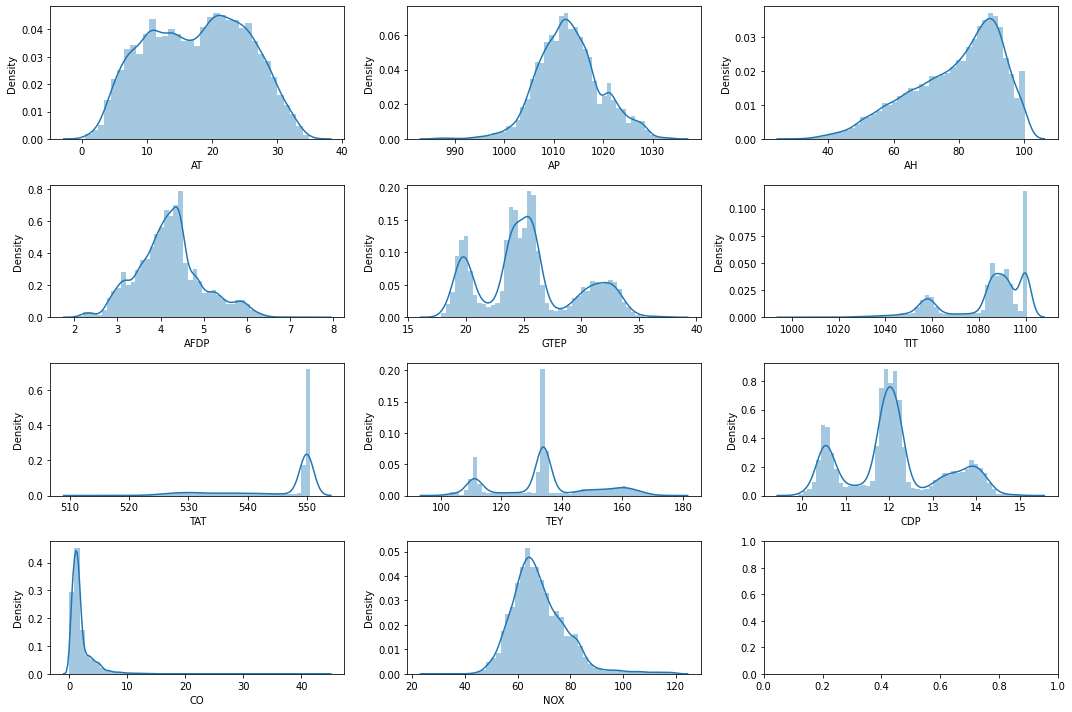

In [8]:
# Visualization using distplot
import warnings
warnings.filterwarnings("ignore")
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.distplot(data.AT, ax=ax[0,0])
sns.distplot(data.AP, ax=ax[0,1])
sns.distplot(data.AH, ax=ax[0,2])
sns.distplot(data.AFDP, ax=ax[1,0])
sns.distplot(data.GTEP, ax=ax[1,1])
sns.distplot(data.TIT, ax=ax[1,2])
sns.distplot(data.TAT, ax=ax[2,0])
sns.distplot(data.TEY, ax=ax[2,1])
sns.distplot(data.CDP, ax=ax[2,2])
sns.distplot(data.CO, ax=ax[3,0])
sns.distplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

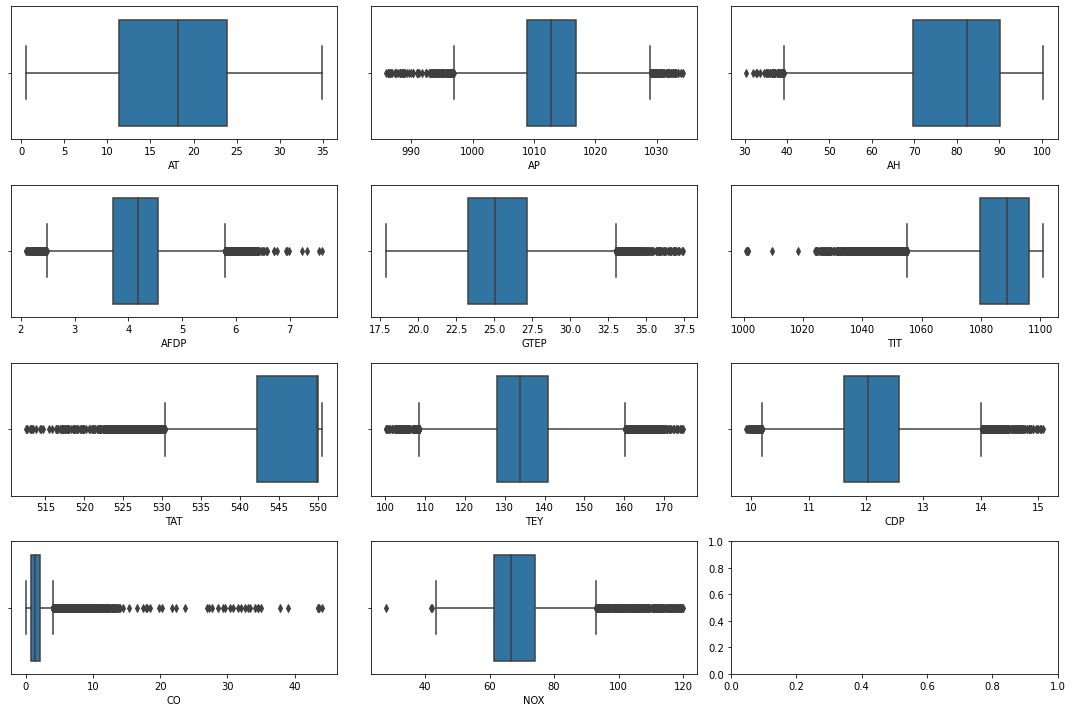

In [9]:
# Checking of outliers
fig, ax = plt.subplots(4, 3, figsize=(15,10))
sns.boxplot(data.AT, ax=ax[0,0])
sns.boxplot(data.AP, ax=ax[0,1])
sns.boxplot(data.AH, ax=ax[0,2])
sns.boxplot(data.AFDP, ax=ax[1,0])
sns.boxplot(data.GTEP, ax=ax[1,1])
sns.boxplot(data.TIT, ax=ax[1,2])
sns.boxplot(data.TAT, ax=ax[2,0])
sns.boxplot(data.TEY, ax=ax[2,1])
sns.boxplot(data.CDP, ax=ax[2,2])
sns.boxplot(data.CO, ax=ax[3,0])
sns.boxplot(data.NOX, ax=ax[3,1])

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler()
data1=pd.DataFrame(scale.fit_transform(data),columns=['AT','AP','AH','AFDP','GTEP','TIT','TAT','TEY','CDP','CO','NOX'])
data1

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,0.184182,0.456050,0.951314,0.255758,0.091426,0.584,0.984015,0.195191,0.135340,0.071522,0.596548
1,0.182020,0.466391,0.955881,0.255721,0.094755,0.585,0.984015,0.195459,0.133988,0.073372,0.597134
2,0.185295,0.474664,0.939003,0.252571,0.097367,0.586,0.980608,0.195325,0.134567,0.072576,0.593791
3,0.189922,0.482937,0.929126,0.252227,0.098033,0.588,0.983753,0.195459,0.135533,0.072375,0.595984
4,0.199830,0.493278,0.927708,0.255323,0.096650,0.589,0.983491,0.195459,0.136692,0.073647,0.592087
...,...,...,...,...,...,...,...,...,...,...,...
15034,0.247272,0.408480,0.975092,0.263380,0.065868,0.489,0.884696,0.153681,0.095739,0.102448,0.562214
15035,0.214075,0.414685,0.984153,0.256826,0.078672,0.455,0.806342,0.155965,0.102113,0.109894,0.566100
15036,0.195962,0.422958,0.989922,0.251593,0.084614,0.369,0.651730,0.134605,0.111772,0.180552,0.685449
15037,0.188443,0.433299,0.982936,0.246451,0.076777,0.424,0.754455,0.141994,0.121431,0.141693,0.710578


### Extracting the independent and dependent variables

In [11]:
X = data1.drop(axis=0,columns="TEY").values
Y = data1["TEY"].values

In [12]:
X

array([[0.18418215, 0.45604964, 0.95131413, ..., 0.1353398 , 0.07152212,
        0.59654817],
       [0.18201978, 0.4663909 , 0.95588067, ..., 0.13398756, 0.07337235,
        0.59713433],
       [0.18529531, 0.47466391, 0.93900309, ..., 0.13456709, 0.07257648,
        0.59379104],
       ...,
       [0.19596183, 0.4229576 , 0.98992213, ..., 0.11177221, 0.18055195,
        0.68544912],
       [0.18844295, 0.43329886, 0.98293633, ..., 0.12143106, 0.14169257,
        0.71057802],
       [0.18617304, 0.44157187, 0.96182146, ..., 0.1310899 , 0.11294597,
        0.70266486]])

In [13]:
Y

array([0.19519076, 0.19545943, 0.19532509, ..., 0.13460505, 0.14199355,
       0.15327781])

In [14]:
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [15]:
# create model
model = Sequential()
model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

In [16]:
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

In [17]:
# Fit the model
model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 3s 2ms/step - loss: 0.0082 - accuracy: 9.9246e-05 - val_loss: 5.9862e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 2s 2ms/step - loss: 3.9192e-04 - accuracy: 9.9246e-05 - val_loss: 4.3177e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.7158e-04 - accuracy: 9.9246e-05 - val_loss: 2.3935e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.2296e-04 - accuracy: 9.9246e-05 - val_loss: 2.1231e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.1630e-04 - accuracy: 9.9246e-05 - val_loss: 2.1721e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 2s 2ms/step - loss: 2.0424e-04 - accuracy: 9.9246e-05 - val_loss: 1.9233e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===============

1008/1008 [==============================] - 2s 1ms/step - loss: 1.4112e-04 - accuracy: 9.9246e-05 - val_loss: 1.3166e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3637e-04 - accuracy: 9.9246e-05 - val_loss: 1.4264e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3343e-04 - accuracy: 9.9246e-05 - val_loss: 1.2286e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.3132e-04 - accuracy: 9.9246e-05 - val_loss: 1.3246e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 2s 1ms/step - loss: 1.2714e-04 - accuracy: 9.9246e-05 - val_loss: 1.2303e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.2356e-04 - accuracy: 9.9246e-05 - val_loss: 1.1853e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [18]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

470/470 [==============================] - 0s 837us/step - loss: 1.1847e-04 - accuracy: 1.3299e-04
accuracy: 0.01%


In [19]:
history = model.fit(X, Y, validation_split=0.33, epochs=100, batch_size=10)

Epoch 1/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1130e-04 - accuracy: 9.9246e-05 - val_loss: 1.2590e-04 - val_accuracy: 2.0149e-04
Epoch 2/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0992e-04 - accuracy: 9.9246e-05 - val_loss: 1.1293e-04 - val_accuracy: 2.0149e-04
Epoch 3/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1088e-04 - accuracy: 9.9246e-05 - val_loss: 1.2467e-04 - val_accuracy: 2.0149e-04
Epoch 4/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1075e-04 - accuracy: 9.9246e-05 - val_loss: 1.1988e-04 - val_accuracy: 2.0149e-04
Epoch 5/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0927e-04 - accuracy: 9.9246e-05 - val_loss: 1.3118e-04 - val_accuracy: 2.0149e-04
Epoch 6/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.1008e-04 - accuracy: 9.9246e-05 - val_loss: 1.1849e-04 - val_accuracy: 2.0149e-04
Epoch 7/100
1008/1008 [===========

1008/1008 [==============================] - 1s 1ms/step - loss: 1.0990e-04 - accuracy: 9.9246e-05 - val_loss: 1.1555e-04 - val_accuracy: 2.0149e-04
Epoch 52/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0674e-04 - accuracy: 9.9246e-05 - val_loss: 2.0593e-04 - val_accuracy: 2.0149e-04
Epoch 53/100
1008/1008 [==============================] - 2s 2ms/step - loss: 1.0858e-04 - accuracy: 9.9246e-05 - val_loss: 1.2049e-04 - val_accuracy: 2.0149e-04
Epoch 54/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0758e-04 - accuracy: 9.9246e-05 - val_loss: 1.3095e-04 - val_accuracy: 2.0149e-04
Epoch 55/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0779e-04 - accuracy: 9.9246e-05 - val_loss: 1.8973e-04 - val_accuracy: 2.0149e-04
Epoch 56/100
1008/1008 [==============================] - 1s 1ms/step - loss: 1.0818e-04 - accuracy: 9.9246e-05 - val_loss: 1.1571e-04 - val_accuracy: 2.0149e-04
Epoch 57/100
1008/1008 [=================

In [20]:
# Visualize training history

# list all data in history
model.history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

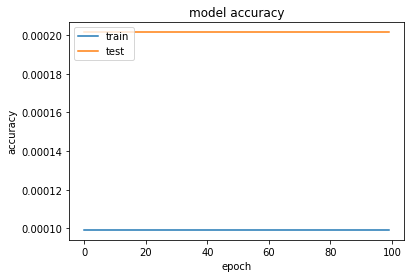

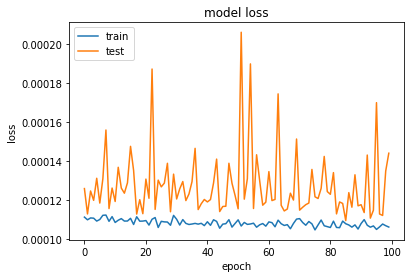

In [21]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Tuning of Hyperparameters :- Batch Size and Epochs

In [22]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam

In [23]:
# create model
def create_model():
    model = Sequential()
    model.add(Dense(12, input_dim=10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(8, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))
    
    adam=Adam(lr=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['accuracy'])
    return model

In [24]:
# Create the model
model = KerasClassifier(build_fn = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X,Y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=10, epochs=10....................................
[CV 1/5; 1/9] END ..................batch_size=10, epochs=10; total time=  10.0s
[CV 2/5; 1/9] START batch_size=10, epochs=10....................................
[CV 2/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.4s
[CV 3/5; 1/9] START batch_size=10, epochs=10....................................
[CV 3/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.6s
[CV 4/5; 1/9] START batch_size=10, epochs=10....................................
[CV 4/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.4s
[CV 5/5; 1/9] START batch_size=10, epochs=10....................................
[CV 5/5; 1/9] END ..................batch_size=10, epochs=10; total time=   9.3s
[CV 1/5; 2/9] START batch_size=10, epochs=50....................................
[CV 1/5; 2/9] END ..................batch_size=10